In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [118]:
train = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', nrows=1_00_000)
test = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')

## Converting daytime object to datetime format

## It was just hard to do this I mean converting time like this

In [119]:
train["DateTime"] = pd.to_datetime(train['pickup_datetime'], unit='ns')


In [120]:
train['key'] = pd.to_datetime(train['key'], unit='ns')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                100000 non-null  datetime64[ns]     
 1   fare_amount        100000 non-null  float64            
 2   pickup_datetime    100000 non-null  object             
 3   pickup_longitude   100000 non-null  float64            
 4   pickup_latitude    100000 non-null  float64            
 5   dropoff_longitude  100000 non-null  float64            
 6   dropoff_latitude   100000 non-null  float64            
 7   passenger_count    100000 non-null  int64              
 8   DateTime           100000 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 6.9+ MB


In [121]:
test["DateTime"] = pd.to_datetime(test['pickup_datetime'], unit='ns')


In [122]:
test["key"] = pd.to_datetime(test['key'], unit='ns')
test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DateTime
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2015-01-27 13:08:24+00:00
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2015-01-27 13:08:24+00:00
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2011-10-08 11:53:44+00:00
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,2012-12-01 21:12:12+00:00
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2012-12-01 21:12:12+00:00
...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.000000200,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6,2015-05-10 12:37:51+00:00
9910,2015-01-12 17:05:51.000000100,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6,2015-01-12 17:05:51+00:00
9911,2015-04-19 20:44:15.000000100,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6,2015-04-19 20:44:15+00:00
9912,2015-01-31 01:05:19.000000500,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6,2015-01-31 01:05:19+00:00


**dropping null values**

In [123]:
train.dropna(inplace=True)
test.dropna(inplace = True)

In [124]:
train.shape

(100000, 9)

In [125]:
# train = train.drop(['key','pickup_datetime'], axis = 1)
train = train.drop(['pickup_datetime'], axis = 1)
train.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DateTime
0,2009-06-15 17:26:21.000000100,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21+00:00
1,2010-01-05 16:52:16.000000200,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16+00:00
2,2011-08-18 00:35:00.000000490,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00+00:00
3,2012-04-21 04:30:42.000000100,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42+00:00
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00+00:00


In [126]:
# test = test.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['pickup_datetime'], axis = 1)
test.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DateTime
0,2015-01-27 13:08:24.000000200,-73.973320,40.763805,-73.981430,40.743835,1,2015-01-27 13:08:24+00:00
1,2015-01-27 13:08:24.000000300,-73.986862,40.719383,-73.998886,40.739201,1,2015-01-27 13:08:24+00:00
2,2011-10-08 11:53:44.000000200,-73.982524,40.751260,-73.979654,40.746139,1,2011-10-08 11:53:44+00:00
3,2012-12-01 21:12:12.000000200,-73.981160,40.767807,-73.990448,40.751635,1,2012-12-01 21:12:12+00:00
4,2012-12-01 21:12:12.000000300,-73.966046,40.789775,-73.988565,40.744427,1,2012-12-01 21:12:12+00:00


## Defining the labels and features

In [127]:
y = train.iloc[0:,[0,1]]
x = train.iloc[0:,[2,3,4,5,6,7]]

**Adding distance to x**

In [128]:
R = 6373.0
lat1 =np.asarray(np.radians(x['pickup_latitude']))
lon1 = np.asarray(np.radians(x['pickup_longitude']))
lat2 = np.asarray(np.radians(x['dropoff_latitude']))
lon2 = np.asarray(np.radians(x['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
ls1=[] 
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c

    
x['Distance']=np.asarray(distance)*0.621

# x_clean = x.drop([ 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1)
# x_clean.head()
x.head()



,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DateTime,Distance
0,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21+00:00,0.640305
1,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16+00:00,5.249180
2,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00+00:00,0.863166
3,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42+00:00,1.738893
4,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00+00:00,1.241866


**Adding distance to Train**

In [129]:
R = 6373.0
lat1 =np.asarray(np.radians(train['pickup_latitude']))
lon1 = np.asarray(np.radians(train['pickup_longitude']))
lat2 = np.asarray(np.radians(train['dropoff_latitude']))
lon2 = np.asarray(np.radians(train['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
ls1=[] 
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c

    
train['Distance']=np.asarray(distance)*0.621

# x_clean = x.drop([ 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1)
# x_clean.head()
train.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DateTime,Distance
0,2009-06-15 17:26:21.000000100,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21+00:00,0.640305
1,2010-01-05 16:52:16.000000200,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16+00:00,5.249180
2,2011-08-18 00:35:00.000000490,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00+00:00,0.863166
3,2012-04-21 04:30:42.000000100,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42+00:00,1.738893
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00+00:00,1.241866


**Adding distance to test**

In [130]:
R = 6373.0
lat11 =np.asarray(np.radians(test['pickup_latitude']))
lon11 = np.asarray(np.radians(test['pickup_longitude']))
lat22 = np.asarray(np.radians(test['dropoff_latitude']))
lon22 = np.asarray(np.radians(test['dropoff_longitude']))

dlon1 = lon22 - lon11
dlat1 = lat22 - lat11
ls1=[] 
a1 = np.sin(dlat1/2)**2 + np.cos(lat11) * np.cos(lat22) * np.sin(dlon1/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1

    
test['Distance']=np.asarray(distance1)*0.621
# test_clean = test.drop([ 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1)

# test_clean.dtypes

test.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DateTime,Distance
0,2015-01-27 13:08:24.000000200,-73.973320,40.763805,-73.981430,40.743835,1,2015-01-27 13:08:24+00:00,1.443197
1,2015-01-27 13:08:24.000000300,-73.986862,40.719383,-73.998886,40.739201,1,2015-01-27 13:08:24+00:00,1.506617
2,2011-10-08 11:53:44.000000200,-73.982524,40.751260,-73.979654,40.746139,1,2011-10-08 11:53:44+00:00,0.384289
3,2012-12-01 21:12:12.000000200,-73.981160,40.767807,-73.990448,40.751635,1,2012-12-01 21:12:12+00:00,1.218183
4,2012-12-01 21:12:12.000000300,-73.966046,40.789775,-73.988565,40.744427,1,2012-12-01 21:12:12+00:00,3.346564


In [131]:
x.dtypes

pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
DateTime             datetime64[ns, UTC]
Distance                         float64
dtype: object

In [132]:
y.dtypes

key            datetime64[ns]
fare_amount           float64
dtype: object

In [133]:
print(x.head(),y.head(),test.head(),train.head())

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count                  DateTime  Distance  
0                1 2009-06-15 17:26:21+00:00  0.640305  
1                1 2010-01-05 16:52:16+00:00  5.249180  
2                2 2011-08-18 00:35:00+00:00  0.863166  
3                1 2012-04-21 04:30:42+00:00  1.738893  
4                1 2010-03-09 07:51:00+00:00  1.241866                               key  fare_amount
0 2009-06-15 17:26:21.000000100          4.5
1 2010-01-05 16:52:16.000000200         16.9
2 2011-08-18 00:35:00.000000490          5.7
3 2012-04-21 04

## Training Starts


## Plotting graph of cost vs distance

In [134]:
import matplotlib as plt
from sklearn import datasets,linear_model

In [135]:
a = x.iloc[0:200,6]
b = y.iloc[0:200,1]


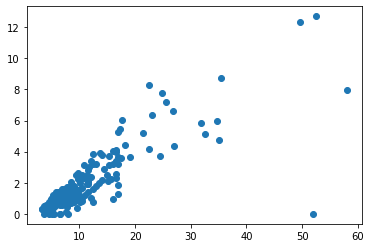

In [136]:
import matplotlib.pyplot as plt


plt.scatter(b,a)
plt.show()



## Converting datetime to float()

In [137]:
train['DateTime'] = pd.to_numeric(pd.to_datetime(train['DateTime']))
train['key'] = pd.to_numeric(pd.to_datetime(train['key']))
test['DateTime'] = pd.to_numeric(pd.to_datetime(test['DateTime']))
test['key'] = pd.to_numeric(pd.to_datetime(test['key']))
y['key'] = pd.to_numeric(pd.to_datetime(y['key']))

x['DateTime'] = pd.to_numeric(pd.to_datetime(x['DateTime']))


**Defining y for the prediction**

In [138]:
y = y.iloc[:,1]

## Splitting the values

In [139]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Traning the model

In [140]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
y_predicted = lr.predict(x_test)
print(lr.score(x_test,y_test))
# 1st test  = -0.013287637014155473

0.016623056400431713


***Testing the accuracy***

In [141]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)
# # 1st test  = 112.004853684073
## with 100000 dataset = 94.0358896381812
## with 1000000 dataset try 1 = 95.36892390730144
## with 1000000 dataset try 2 = 95.36026307535313
## with 1000000 dataset try 3 = 96.83297952994907
## with 100000 dataset  = 93.37144467436306
## with 10000 dataset try1 = 96.03901121564002
## with 10000 dataset try2 = 81.26929962886342
## with 10000 dataset try3 = 98.48885378200688
## with 10000 dataset try4 = 104.36002792791918
## with 10000 dataset try5 = 97.20492555017101
## with 10000 dataset try6 = 83.93965348592229
## with 10000 dataset try7 = 75.27941712945345
## with 10000 dataset try8  = 78.95396330172005
## with 1000 dataset   =   39.90092494230721
## with 1000 dataset   =   76.44837215099844
## with 1000 dataset   =   38.46728504333877
## with 1000 dataset   =   93.07429700649337
## with 1000 dataset   =   48.39973592705823
## with 1000 dataset   =   1055865.4214096582
## with 1000 dataset   =   85.46861840805632
## with 1000 dataset   =   64.39358773994795
## with 100 dataset    =   12.34566678724564
## with 100 dataset    =   10.142841154191558 
## with 100 dataset    =   5.786482441190635
## with 100 dataset    =   30.963445495727807
## with 100 dataset    =   14.648523611686821


93.18972618260759

## Submission starts


In [142]:
pred=np.round(lr.predict(test.drop('key',axis=1)),2)
pred.shape

(9914,)

**Reading the submission file for some insight**

In [143]:
pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv').head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35


In [144]:

Submission=pd.DataFrame(data=pred,columns=['fare_amount'])
Submission['key']=test['key']
Submission=Submission[['key','fare_amount']]

## File Submitted

In [145]:
Submission.set_index('key',inplace=True)